In [1]:
import pandas as pd
train_df = pd.read_csv("house/train.csv", encoding="utf-8")
test_df = pd.read_csv("house/test.csv", encoding="utf-8")

In [2]:
total_df = pd.concat([train_df, test_df], axis=0)
total_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [3]:
# data是你處理的對象
data = total_df.drop(["Id", "SalePrice"], axis=1)
y_train = train_df["SalePrice"]

-0.05453796427128287


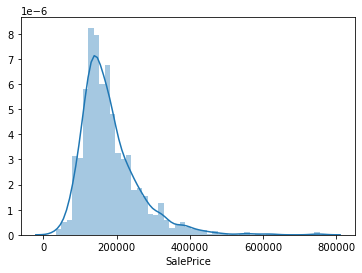

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import boxcox_normmax
print(boxcox_normmax(y_train + 1))
sns.distplot(y_train)

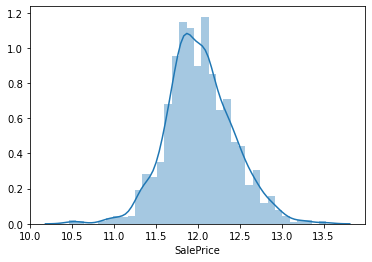

In [5]:
# 把答案凹回常態分佈
import numpy as np
y_train_norm = np.log1p(y_train)
sns.distplot(y_train_norm)

In [6]:
# 拿出所有數字型態的欄位
num_col = data.dtypes[data.dtypes != "object"]
index = num_col.index.drop("MSSubClass")
data_num = data[index]
data_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [7]:
# 計算每個欄位的偏態(=0, >0, <0)
from scipy.stats import skew
skewness = data_num.apply(lambda s:skew(s.dropna()))
skewness.sort_values()

YearBuilt        -0.599806
YearRemodAdd     -0.451020
GarageYrBlt      -0.381942
GarageCars       -0.218260
YrSold            0.132399
FullBath          0.167606
MoSold            0.195884
OverallQual       0.197110
GarageArea        0.241176
BedroomAbvGr      0.326324
OverallCond       0.570312
BsmtFullBath      0.623741
HalfBath          0.694566
Fireplaces        0.733495
TotRmsAbvGrd      0.758367
2ndFlrSF          0.861675
BsmtUnfSF         0.919351
TotalBsmtSF       1.162285
GrLivArea         1.269358
BsmtFinSF1        1.424989
1stFlrSF          1.469604
LotFrontage       1.502351
WoodDeckSF        1.842433
OpenPorchSF       2.535114
MasVnrArea        2.601240
BsmtHalfBath      3.929996
ScreenPorch       3.946694
EnclosedPorch     4.003891
BsmtFinSF2        4.145323
KitchenAbvGr      4.302254
3SsnPorch        11.376065
LowQualFinSF     12.088761
LotArea          12.822431
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

In [8]:
# 取skewness > 4, 盡量把它凹回來變成常態分佈
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
need_norm = skewness[skewness > 0.75].index
def norm(s):
    # log0 -> inf 記得+1
    lamda = boxcox_normmax(s.dropna() + 1)
    return boxcox1p(s, lamda)
x_numeric_norm = data[need_norm].apply(norm)
skewness = x_numeric_norm.apply(lambda s:skew(s.dropna()))
skewness.sort_values()

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


LotArea          -0.135401
1stFlrSF         -0.011611
GrLivArea         0.004848
LotFrontage       0.034596
TotRmsAbvGrd      0.047226
BsmtUnfSF         0.053922
TotalBsmtSF       0.369784
BsmtFinSF1        0.374365
OpenPorchSF       0.621025
WoodDeckSF        0.784768
2ndFlrSF          0.894536
MasVnrArea        0.967387
EnclosedPorch     2.150157
BsmtFinSF2        2.578898
ScreenPorch       3.153911
BsmtHalfBath      3.779434
KitchenAbvGr      3.779896
MiscVal           5.239894
LowQualFinSF      8.495602
3SsnPorch         8.865144
PoolArea         14.985994
dtype: float64

In [9]:
# 偏態沒救, 放棄
data.drop(["PoolArea"], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [10]:
data[x_numeric_norm.columns] = x_numeric_norm
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,12.913513,13.424522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal
1,20,RL,14.416584,13.694528,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal
2,60,RL,13.227729,14.034135,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal
3,70,RL,12.372321,13.683422,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml
4,60,RL,14.791628,14.550144,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,6.893131,10.503898,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,6,2006,WD,Normal
1455,160,RM,6.893131,10.463056,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,4,2006,WD,Abnorml
1456,20,RL,20.642125,15.304042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,9,2006,WD,Abnorml
1457,85,RL,12.591549,13.873788,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,MnPrv,Shed,6.936387,7,2006,WD,Normal


In [11]:
data = pd.get_dummies(data)
data = pd.get_dummies(data, columns=["MSSubClass"])
data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,12.913513,13.424522,7,5,2003,2003,19.495170,117.892035,0.0,29.992179,...,0,0,0,0,0,0,0,0,0,0
1,14.416584,13.694528,6,8,1976,1976,0.000000,146.853590,0.0,44.137330,...,0,0,0,0,0,0,0,0,0,0
2,13.227729,14.034135,7,5,2001,2002,17.823058,91.601451,0.0,56.899234,...,0,0,0,0,0,0,0,0,0,0
3,12.372321,13.683422,7,5,1915,1970,0.000000,52.789065,0.0,64.812068,...,1,0,0,0,0,0,0,0,0,0
4,14.791628,14.550144,8,5,2000,2000,25.496188,112.074233,0.0,61.169352,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6.893131,10.503898,4,7,1970,1970,0.000000,0.000000,0.0,65.239515,...,0,0,0,0,0,0,0,1,0,0
1455,6.893131,10.463056,4,5,1970,1970,0.000000,58.643719,0.0,45.064841,...,0,0,0,0,0,0,0,1,0,0
1456,20.642125,15.304042,5,7,1960,1996,0.000000,170.788340,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1457,12.591549,13.873788,5,5,1992,1992,0.000000,71.466788,0.0,67.278384,...,0,0,0,1,0,0,0,0,0,0


In [12]:
# 缺太多 丟
data = data.drop(["LotFrontage"], axis=1)

In [13]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale,
                          columns=data.columns)

In [14]:
# 補缺
med = data_scale.median()
data_scale = data_scale.fillna(med)
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(max_iter=10, random_state=0)
# data_scale = pd.DataFrame(imp.fit_transform(data_scale),
                          columns=data_scale.columns)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [15]:
x_train = data_scale.iloc[:train_df.shape[0]]
x_test = data_scale.iloc[train_df.shape[0]:]

In [16]:
from sklearn.linear_model import LassoCV, Lasso
cv = LassoCV(cv=10)
cv.fit(x_train, y_train_norm)
print(cv.alpha_)
lasso = Lasso(alpha=cv.alpha_)
lasso.fit(x_train, y_train_norm)
pre = lasso.predict(x_test)
result = pd.DataFrame({
    "Id":test_df["Id"],
    "SalePrice":np.expm1(pre)
})
result.to_csv("house_lasso.csv", encoding="utf-8", index=False)
result

0.0006911173992567034


,Id,SalePrice
0,1461,117068.136380
1,1462,152929.171469
2,1463,179885.363318
3,1464,201403.829121
4,1465,200025.267263
...,...,...
1454,2915,90280.277866
1455,2916,84597.701413
1456,2917,167801.532915
1457,2918,117676.219133


In [17]:
from sklearn.linear_model import RidgeCV, Ridge
cv = RidgeCV(cv=10)
cv.fit(x_train, y_train_norm)
print(cv.alpha_)
ridge = Ridge(alpha=cv.alpha_)
ridge.fit(x_train, y_train_norm)
pre = ridge.predict(x_test)
result = pd.DataFrame({
    "Id":test_df["Id"],
    "SalePrice":np.expm1(pre)
})
result.to_csv("house_ridge.csv", encoding="utf-8", index=False)
result

10.0


,Id,SalePrice
0,1461,116413.013427
1,1462,154446.923334
2,1463,180707.902101
3,1464,196673.909120
4,1465,200006.821371
...,...,...
1454,2915,85822.566295
1455,2916,79768.705001
1456,2917,169262.207783
1457,2918,117135.449767


In [18]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
cv = ElasticNetCV(cv=10)
cv.fit(x_train, y_train_norm)
print(cv.alpha_)
ela = ElasticNet(alpha=cv.alpha_)
ela.fit(x_train, y_train_norm)
pre = ela.predict(x_test)
result = pd.DataFrame({
    "Id":test_df["Id"],
    "SalePrice":np.expm1(pre)
})
result.to_csv("house_ela.csv", encoding="utf-8", index=False)
result

0.0007376571386573105


,Id,SalePrice
0,1461,117891.165385
1,1462,153837.012020
2,1463,180779.186780
3,1464,200130.165195
4,1465,202055.755888
...,...,...
1454,2915,88147.095050
1455,2916,82285.421110
1456,2917,167107.864015
1457,2918,116808.374790
